## Снижение признаков с помощью главных компонент

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets


# загрузить данные
digits = datasets.load_digits()

# Стандратизировать матрицу признаков
features = StandardScaler().fit_transform(digits.data)

# Создать объект PCA, который сохранит 99% дисперсии
pca = PCA(n_components=0.99, whiten=True)


features_pca = pca.fit_transform(features)

print("Исходное количество признаков:", features.shape[1])
print("Сокращение количество признаков:", features_pca.shape[1])


Исходное количество признаков: 64
Сокращение количество признаков: 54


##  Уменьшение количества признаков, когда данные линейно неразделимы

In [41]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt

# Создать линейно неразделимые данные
features, y = make_circles(n_samples = 1000, random_state = 1,
                          noise = 0.1, factor = 0.1)
# Применить ядерный PCA с радиально-базисным функциональным ядром
kpca = KernelPCA(kernel = "rbf", gamma=15, n_components=1)

features_kpca = kpca.fit_transform(features)

print("Исходное:", features.shape[1])
print("Сокращенное:", features_kpca.shape[1])

Исходное: 2
Сокращенное: 1


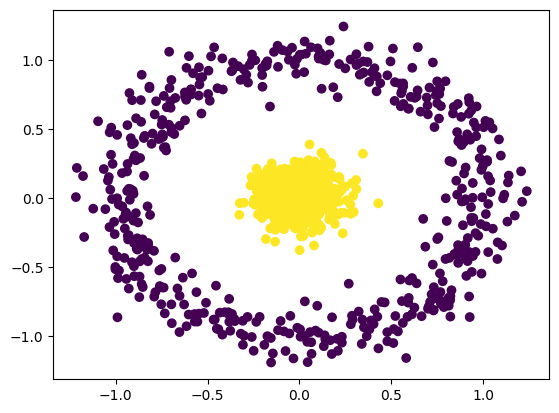

In [46]:
plot= plt.scatter(features[:,0], features[:,1], c=y)

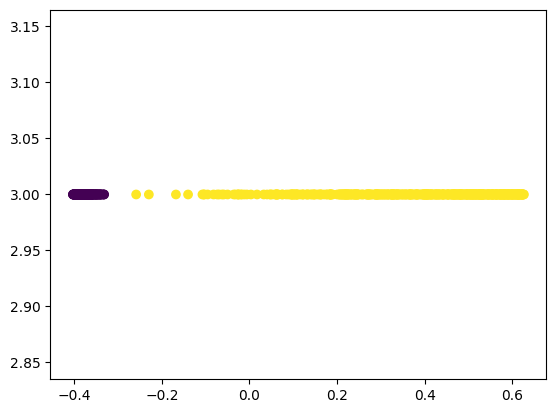

In [49]:
y_x=np.full(shape=len(features_kpca), fill_value=3)
plot= plt.scatter(features_kpca[:,0], y_x, c=y)

## Уменьшение количества признаков путем максимизации разделимости классов

In [67]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
features = iris.data
target = iris.target

lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

(150, 4)

In [69]:
print("Исходное колво:", features.shape[1])
print("Сокращенное колво:", features_lda.shape[1])

Исходное колво: 4
Сокращенное колво: 1


In [70]:
lda.explained_variance_ratio_

array([0.9912126])

## Уменьшение количества признаков с использованием разложения матриц

Дана матрица признаков с неотрицательными значениями, и требуется уменьшить ее размерность

In [72]:
from sklearn.decomposition import NMF
from sklearn import datasets

digits = datasets.load_digits()

features = digits.data


# Создать NMF и выполнить его подгонку
nmf = NMF(n_components=10, random_state=1)

features_nmf = nmf.fit_transform(features)

print("Исходное колво:", features.shape[1])
print("Сокращенное колво:", features_nmf.shape[1])

Исходное колво: 64
Сокращенное колво: 10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## Уменьшение количества признаков на разреженных данных

Дана разряженная матрица признаков, и требуется уменьшить ее размерность

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

digits = datasets.load_digits()

features = StandardScaler().fit_transform(digits.data)

features_sparse = csr_matrix(features)

tsvd = TruncatedSVD(n_components=10)

features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

print("Исходное колво:", features_sparse.shape[1])
print("Сокращенное колво:", features_sparse_tsvd.shape[1])

Исходное колво: 64
Сокращенное колво: 10


In [83]:
tsvd.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860154,
       0.04214117, 0.03942024, 0.03389245, 0.02997979, 0.02931925])